In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(f'numpy : {np.__version__}')
print(f'pandas : {pd.__version__}')
print(f'seaborn : {sns.__version__}')
print(f'matplotlib : {mpl.__version__}')

numpy : 1.26.4
pandas : 2.1.4
seaborn : 0.12.2
matplotlib : 3.8.0


In [3]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

In [5]:
data = pd.read_csv('netflix_titles.csv')
print(data.shape)

(7787, 12)


In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [8]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [9]:
country_movie_counts=movie['country'].value_counts().head(10)
top_10_countries_movies = pd.DataFrame({'Country': country_movie_counts.index, 'Number of Movies': country_movie_counts.values})
print(top_10_countries_movies)

          Country  Number of Movies
0   United States              1850
1           India               852
2            NULL               230
3  United Kingdom               193
4          Canada               118
5           Egypt                89
6           Spain                89
7          Turkey                73
8     Philippines                70
9          France                69


In [10]:
country_tv_show_counts=tv_show['country'].value_counts().head(10)
top_10_countries_tv_shows = pd.DataFrame({'Country': country_tv_show_counts.index, 'Number of TV Show': country_tv_show_counts.values})
print(top_10_countries_tv_shows)

          Country  Number of TV Show
0   United States                705
1            NULL                277
2  United Kingdom                204
3           Japan                157
4     South Korea                147
5           India                 71
6          Taiwan                 68
7          Canada                 59
8       Australia                 46
9          France                 46


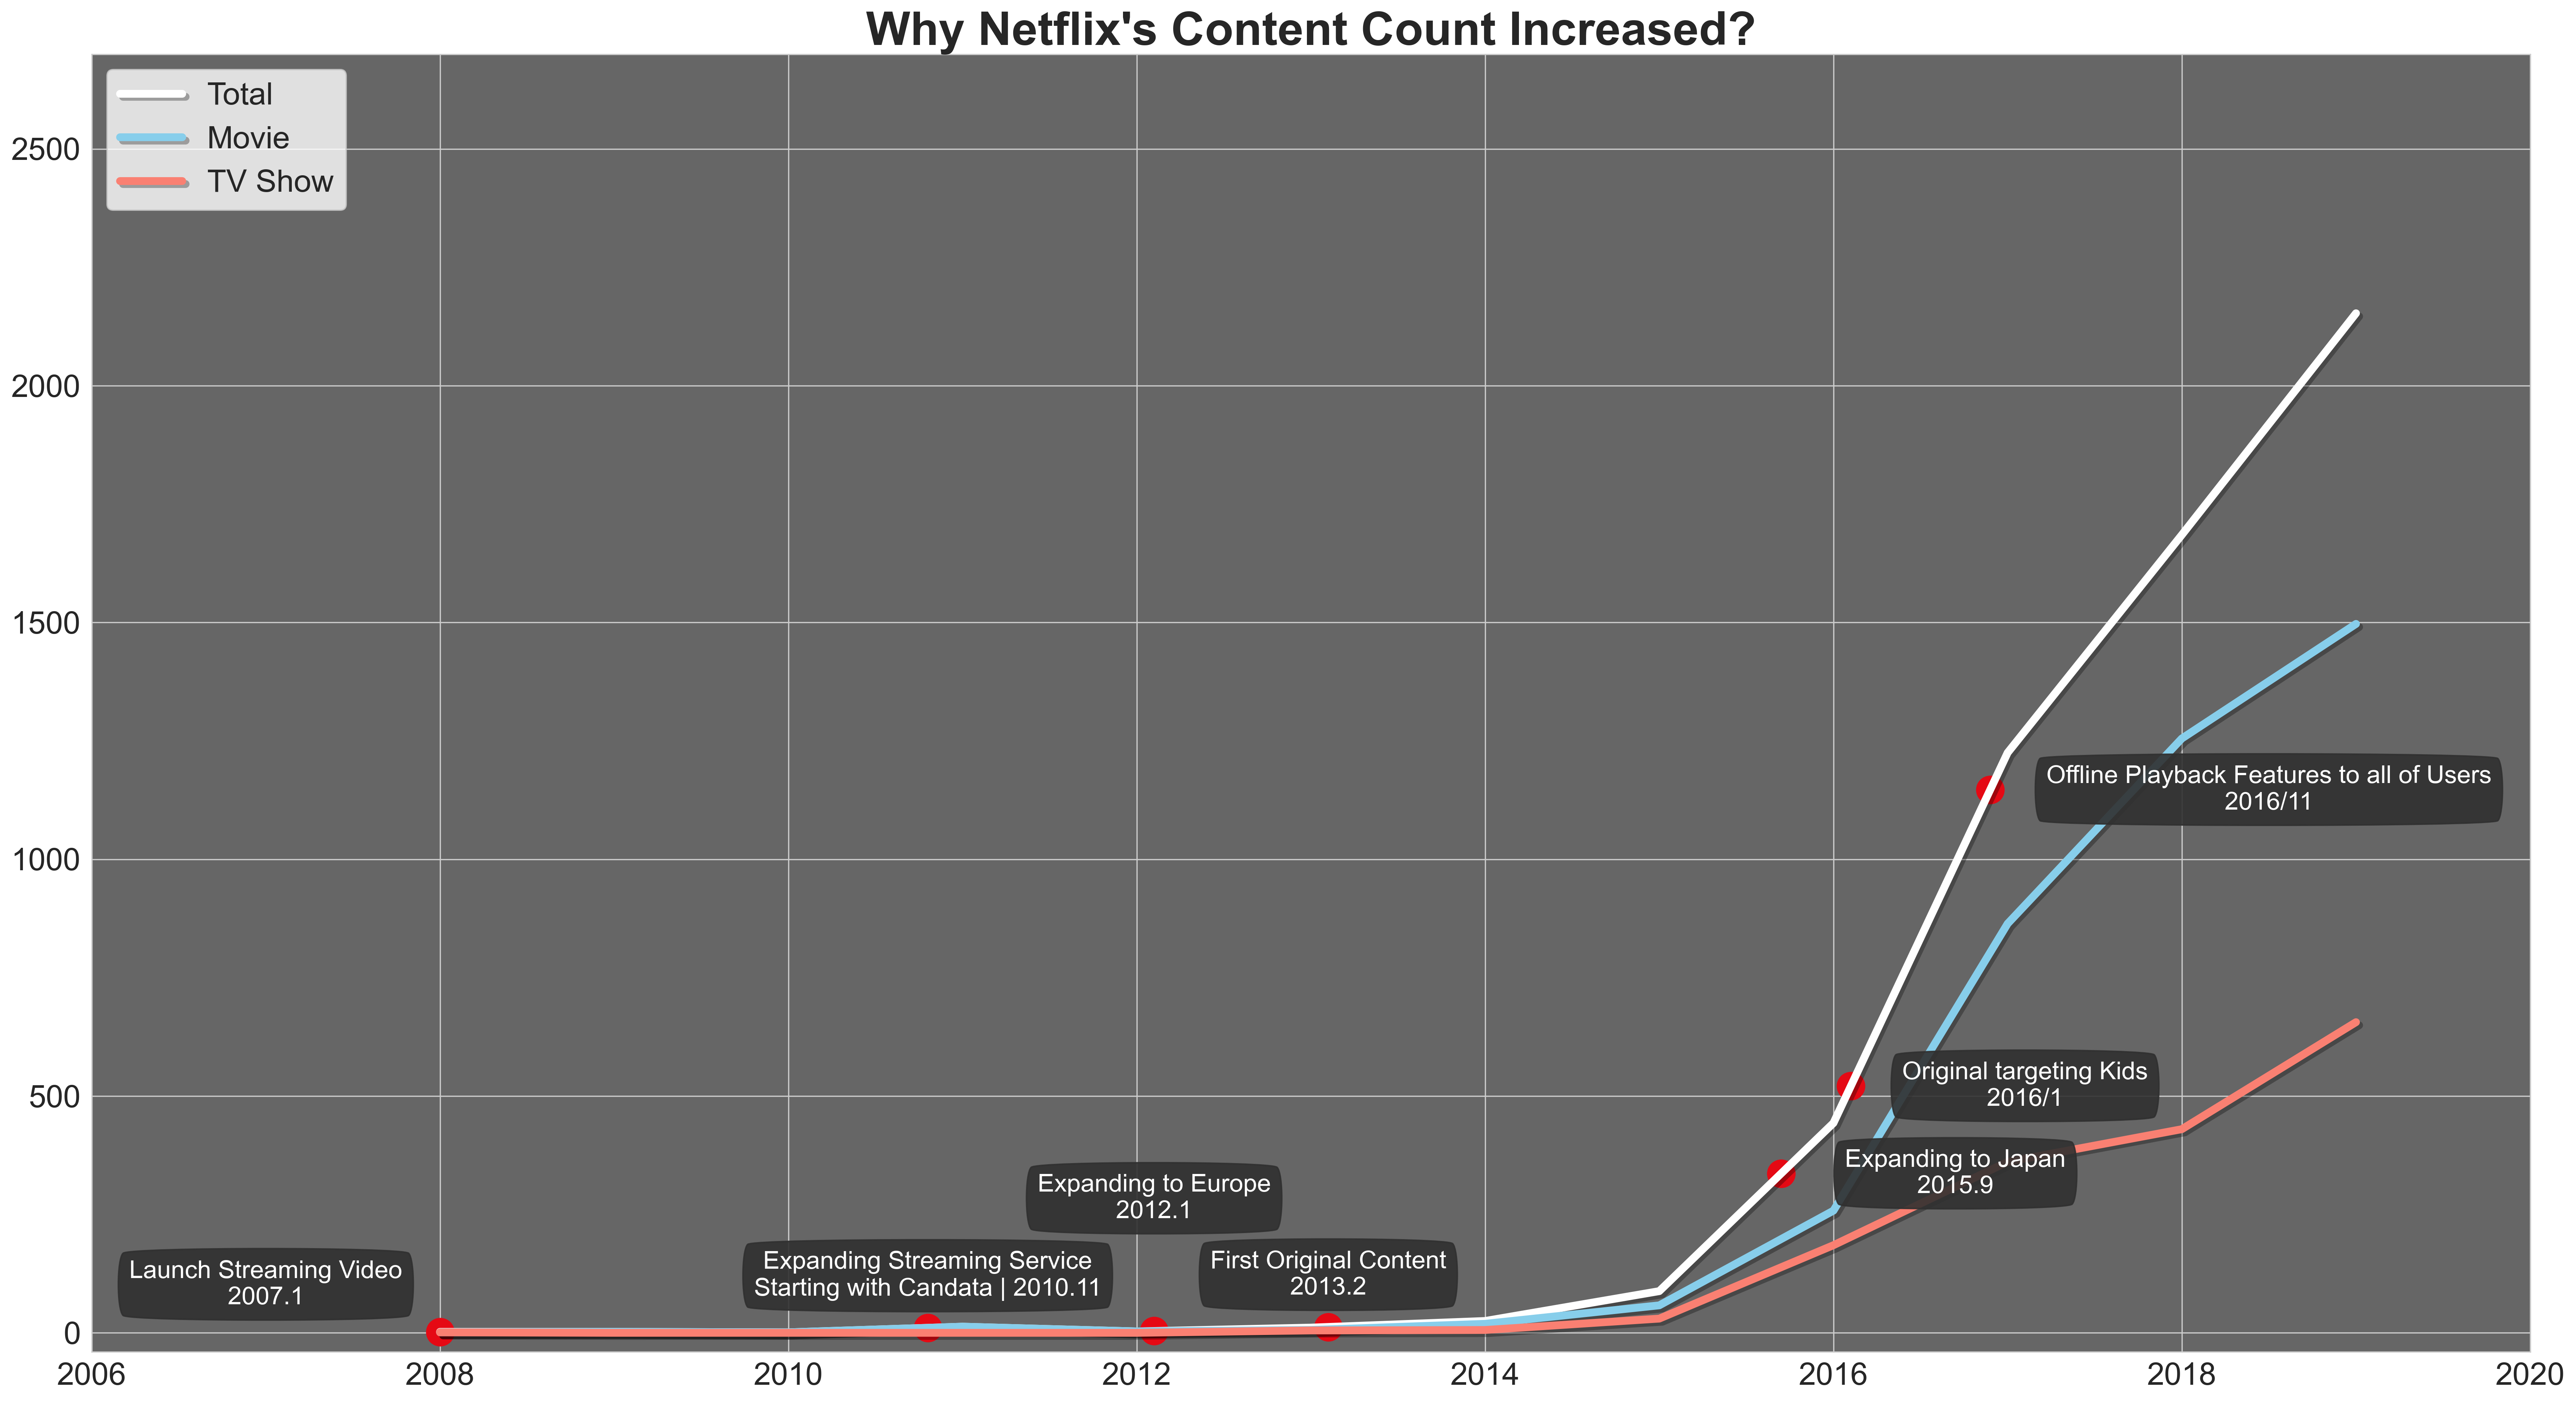

In [11]:
import matplotlib.patheffects as path_effects
year_data = data['year_added'].value_counts().sort_index().loc[:2019]
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Content Count Increased?", position=(0.5, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

In [12]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

In [13]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 9067
top 20 countries : 7879
percentage : 7879/9067 = 86.8975405315981


In [14]:
top20_country = country_counting[:20]

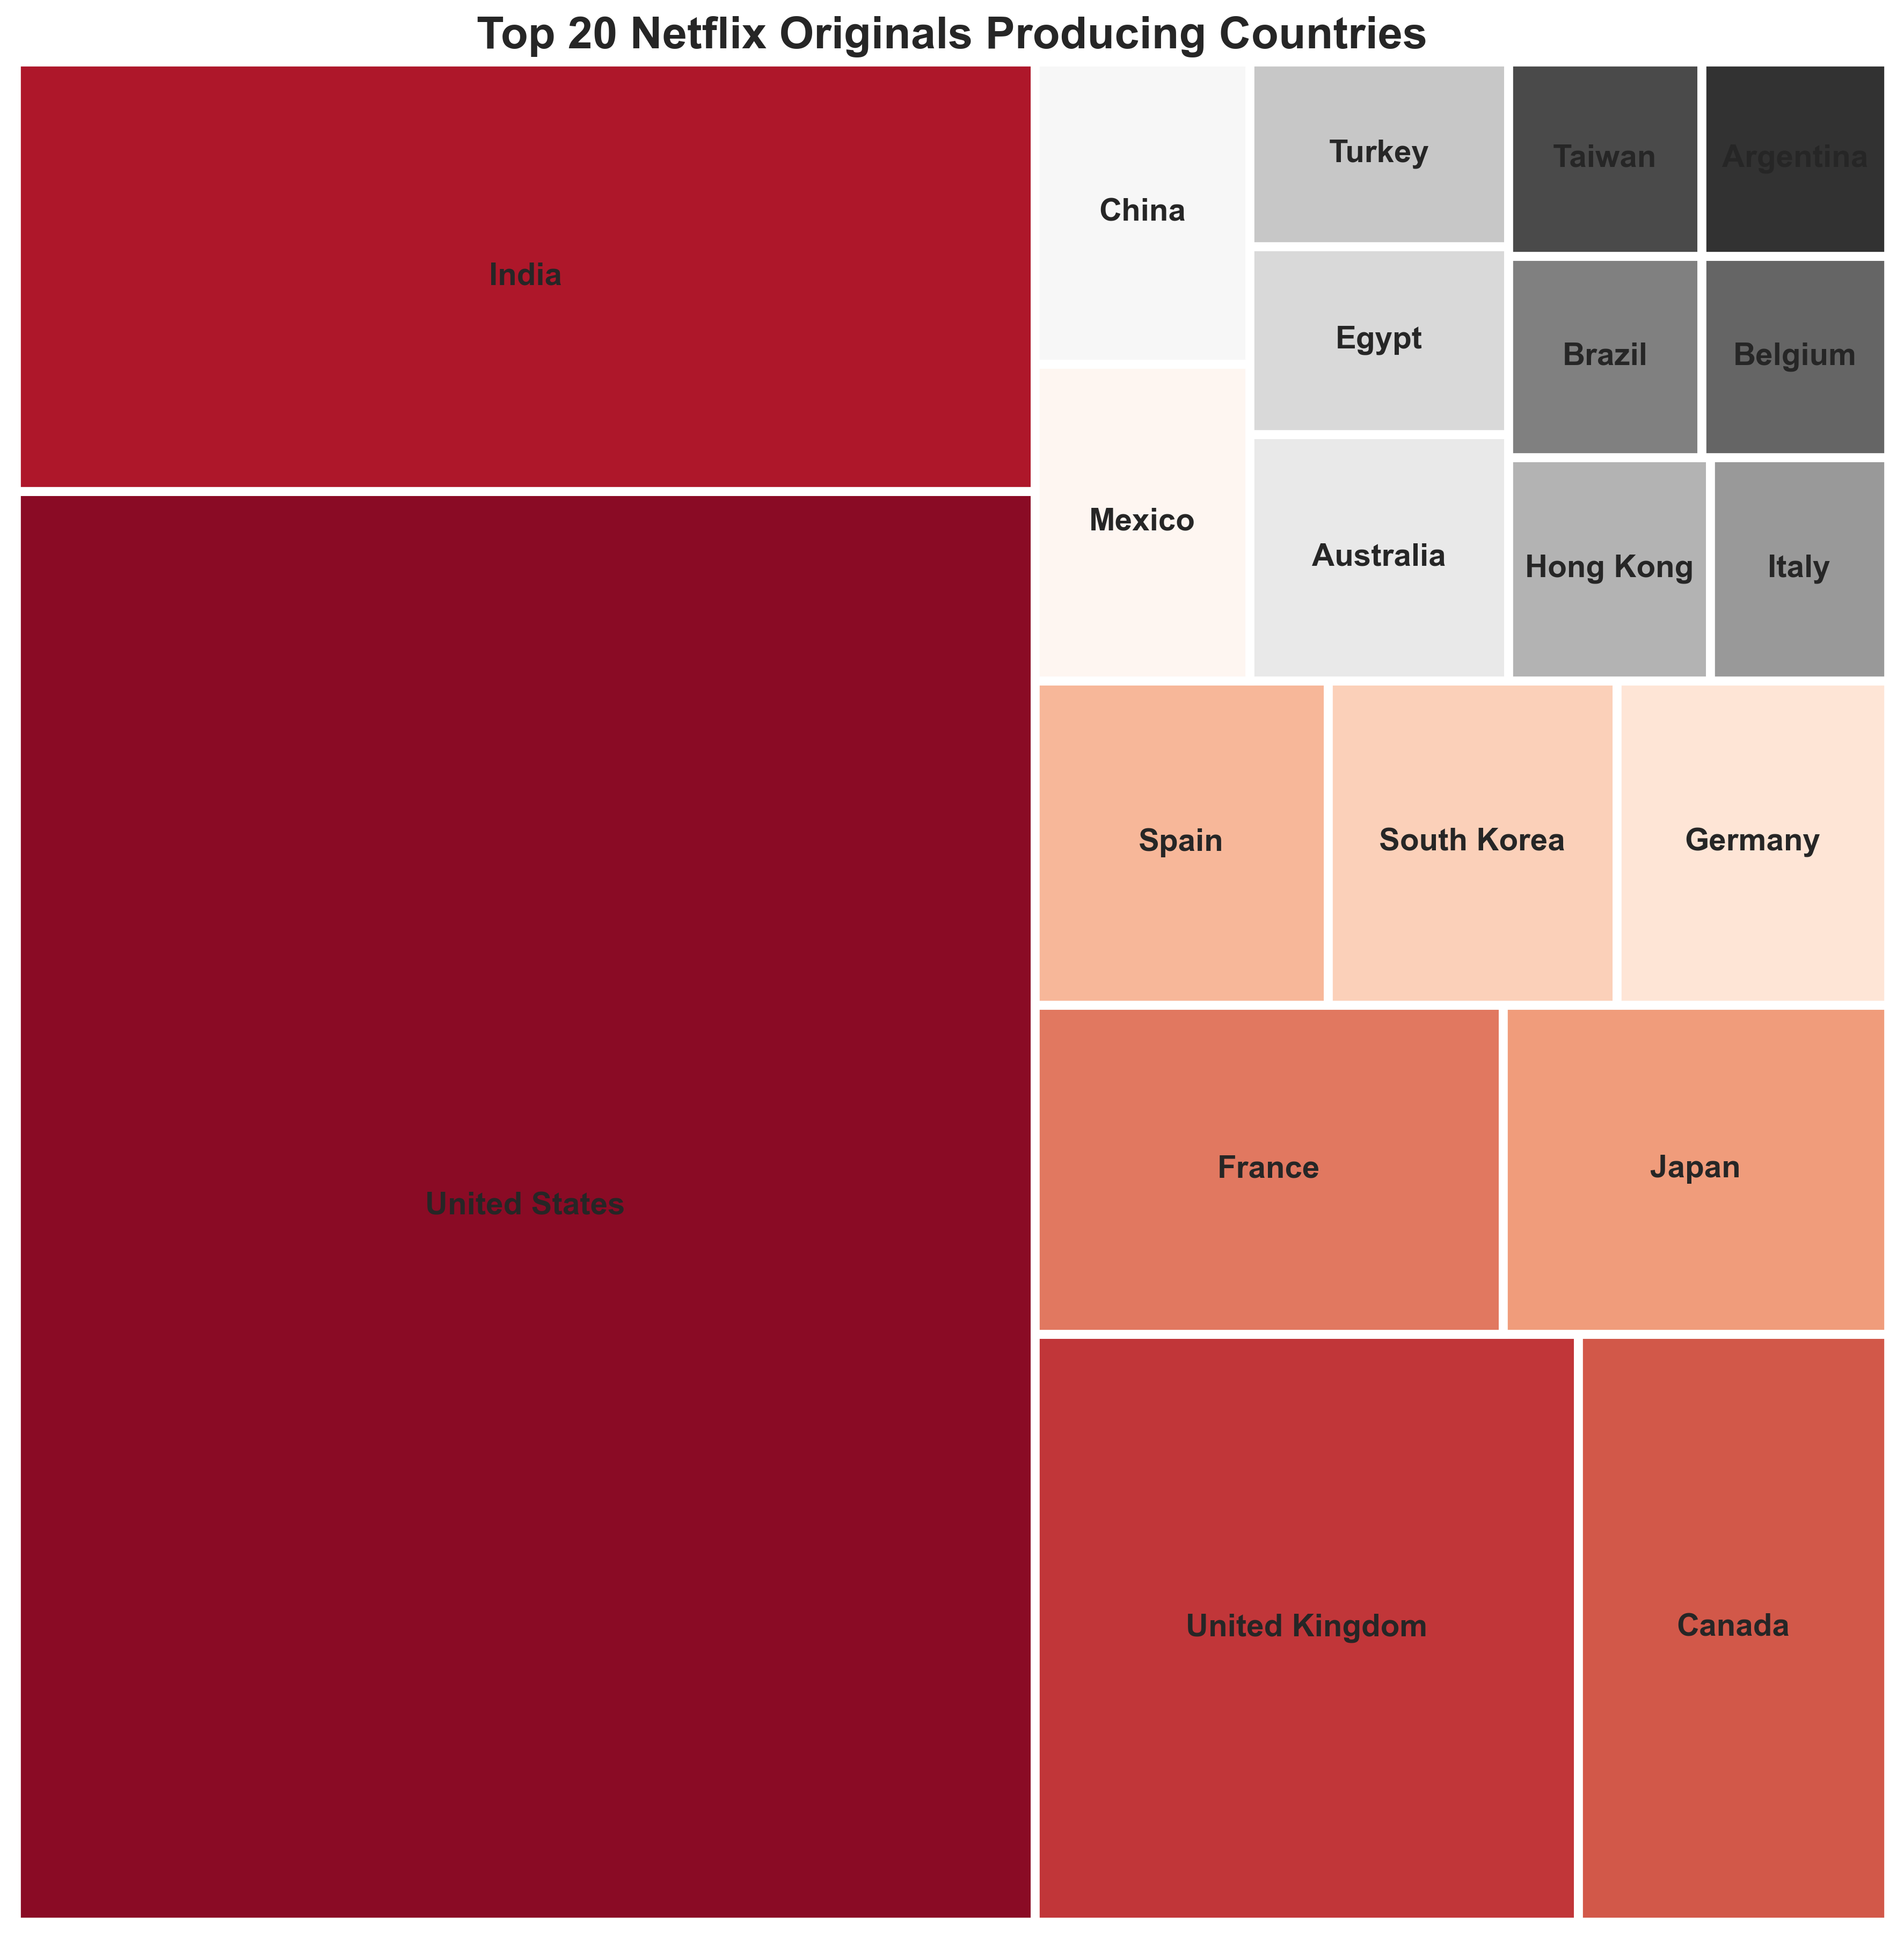

In [15]:
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 Netflix Originals Producing Countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [16]:
data['country'] = data['country'].dropna().apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({
      col :  np.repeat(data[col].values, data[lst_col].str.len())
      for col in data.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]

In [17]:
import altair as alt

In [18]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

In [19]:
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='normalize'),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)      
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

In [20]:
import plotly.express as px
year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

In [21]:
# Mostrar las primeras filas del DataFrame para entender su estructura
data.head()


movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

# Definir el orden de las calificaciones
rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']


In [22]:
# Separar los datos en películas y programas de televisión
movies = data.head()[data.head()['type'] == 'Movie']
tv_shows = data.head()[data.head()['type'] == 'TV Show']

# Definir el orden de las calificaciones
rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Contar las calificaciones para películas y programas de televisión
movie_rating = movies['rating'].value_counts().reindex(rating_order, fill_value=0)
tv_rating = tv_shows['rating'].value_counts().reindex(rating_order, fill_value=0)

movie_rating, tv_rating

# Contar las calificaciones para películas y programas de televisión utilizando reindex con fill_value=0
movie_rating = movies['rating'].value_counts().reindex(rating_order, fill_value=0)
tv_rating = tv_shows['rating'].value_counts().reindex(rating_order, fill_value=0)

movie_rating, tv_rating

(rating
 G           0
 TV-Y        0
 TV-G        0
 PG          0
 TV-Y7       0
 TV-Y7-FV    0
 TV-PG       0
 PG-13       2
 TV-14       0
 R           1
 NC-17       0
 TV-MA       1
 Name: count, dtype: int64,
 rating
 G           0
 TV-Y        0
 TV-G        0
 PG          0
 TV-Y7       0
 TV-Y7-FV    0
 TV-PG       0
 PG-13       0
 TV-14       0
 R           0
 NC-17       0
 TV-MA       1
 Name: count, dtype: int64)

In [23]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

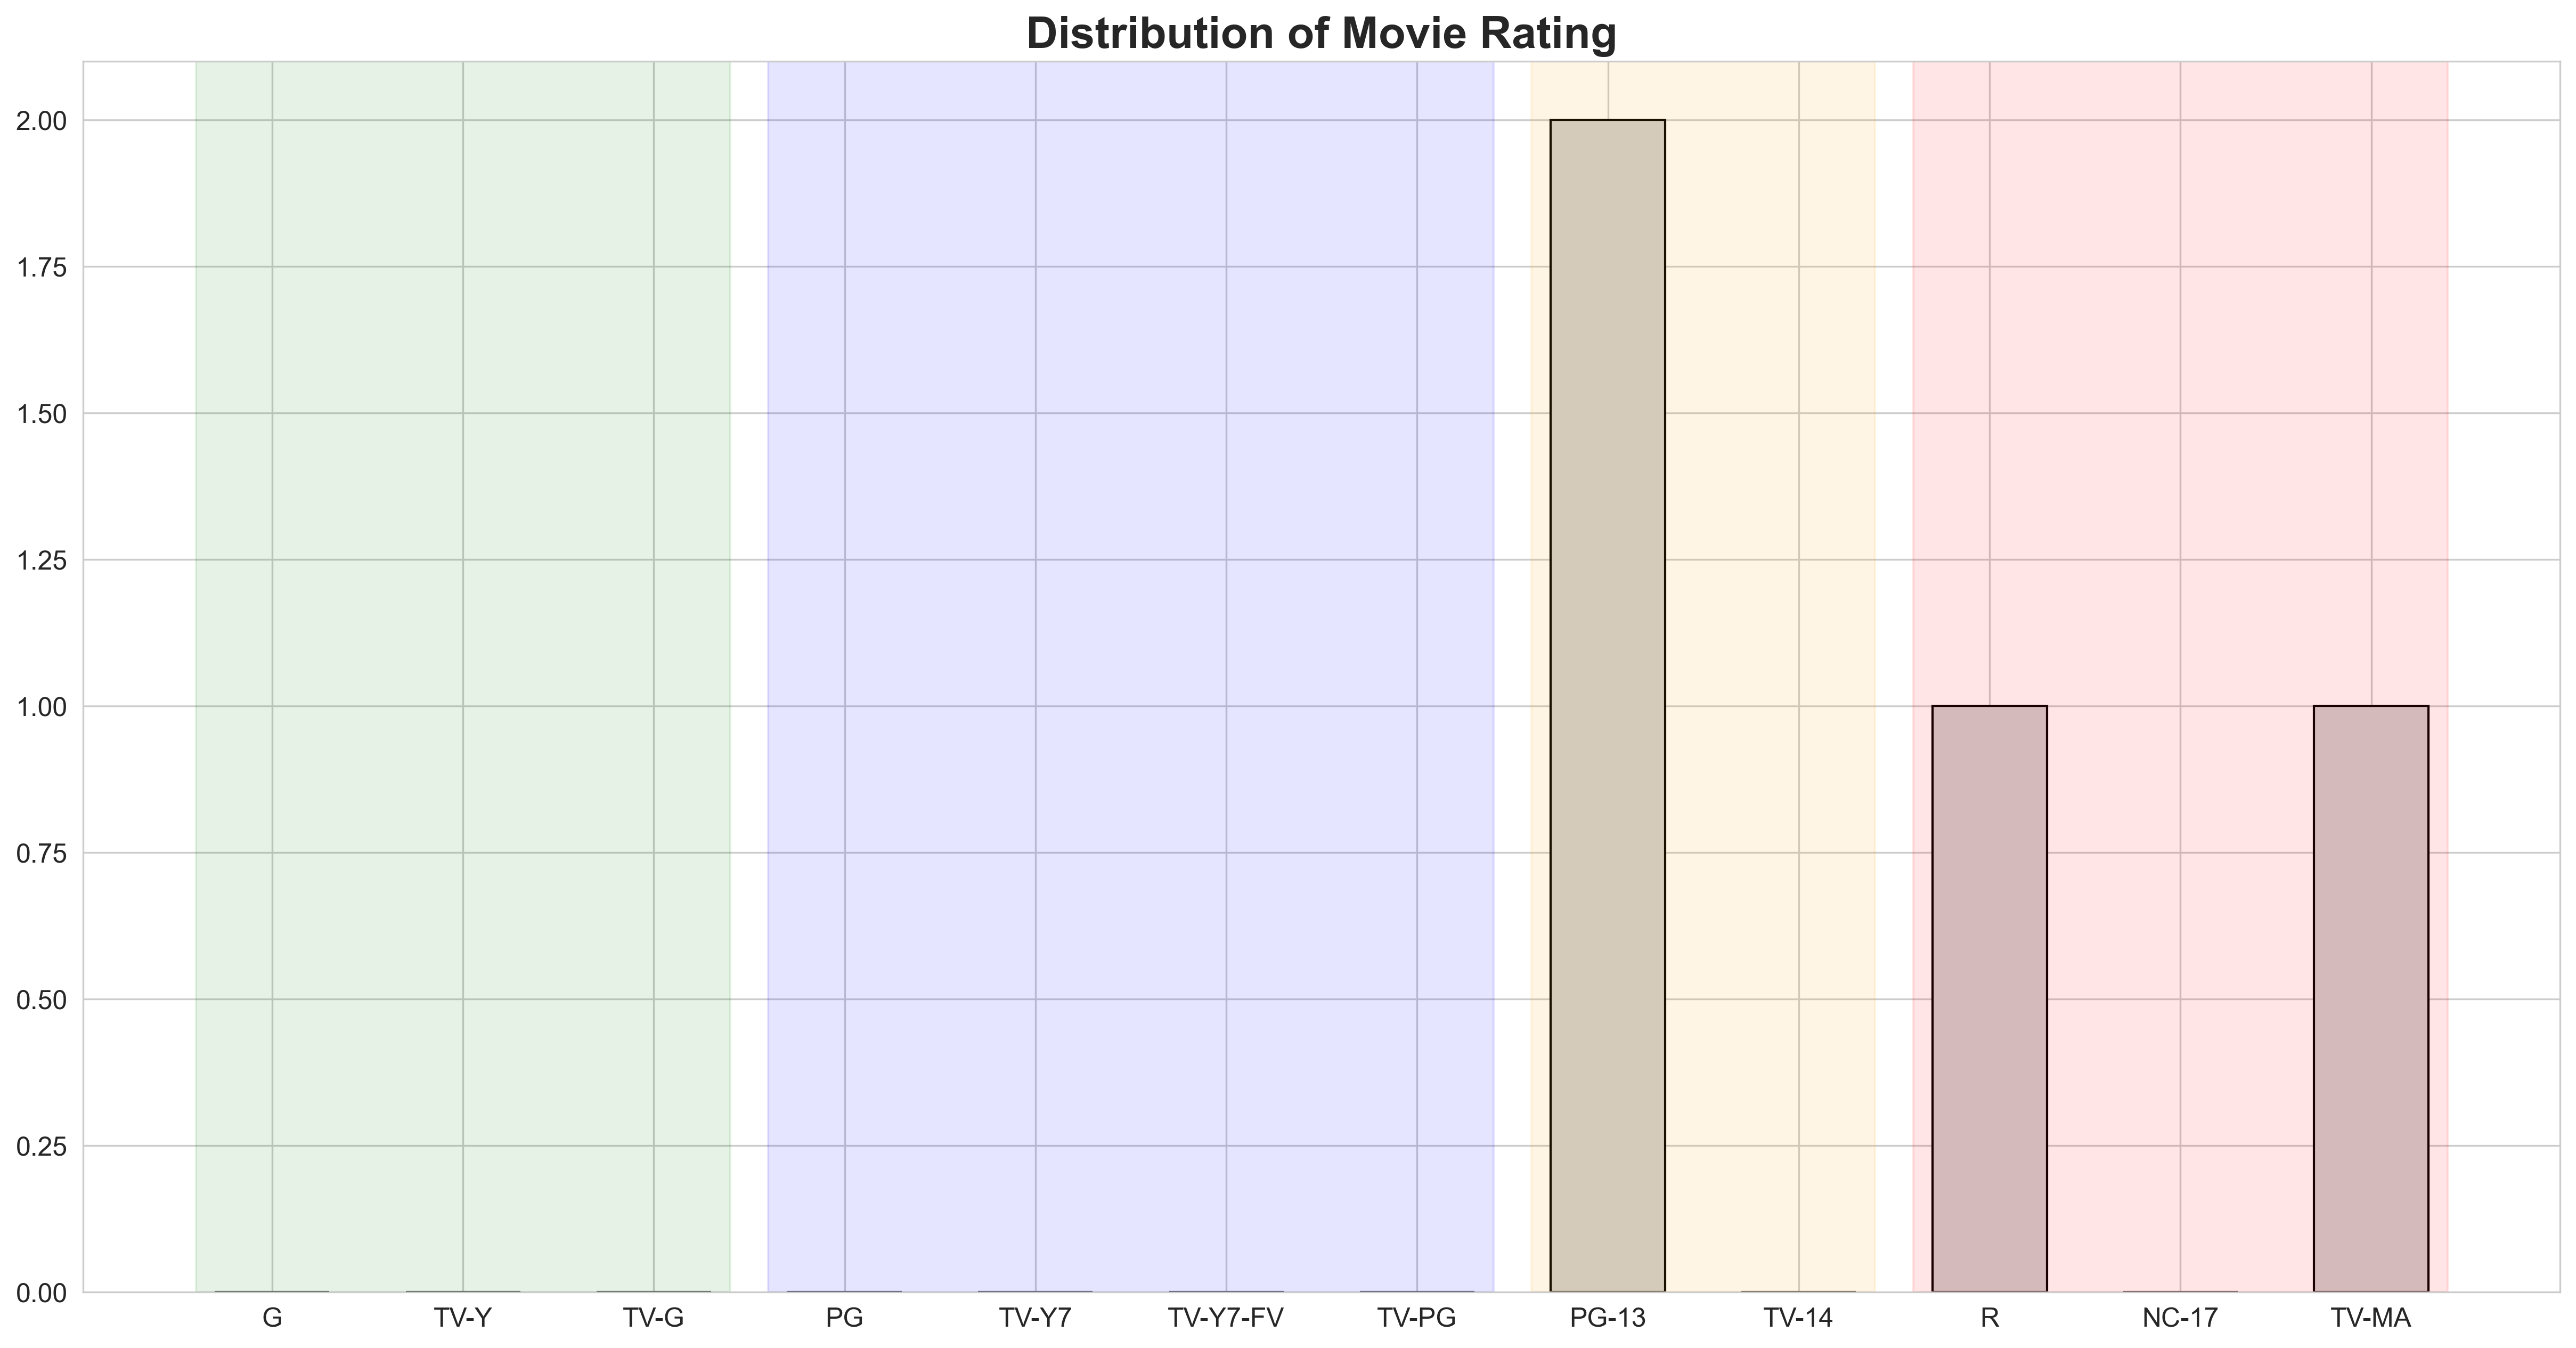

In [24]:
rating_barplot(movie_rating,'Movie', 1200)

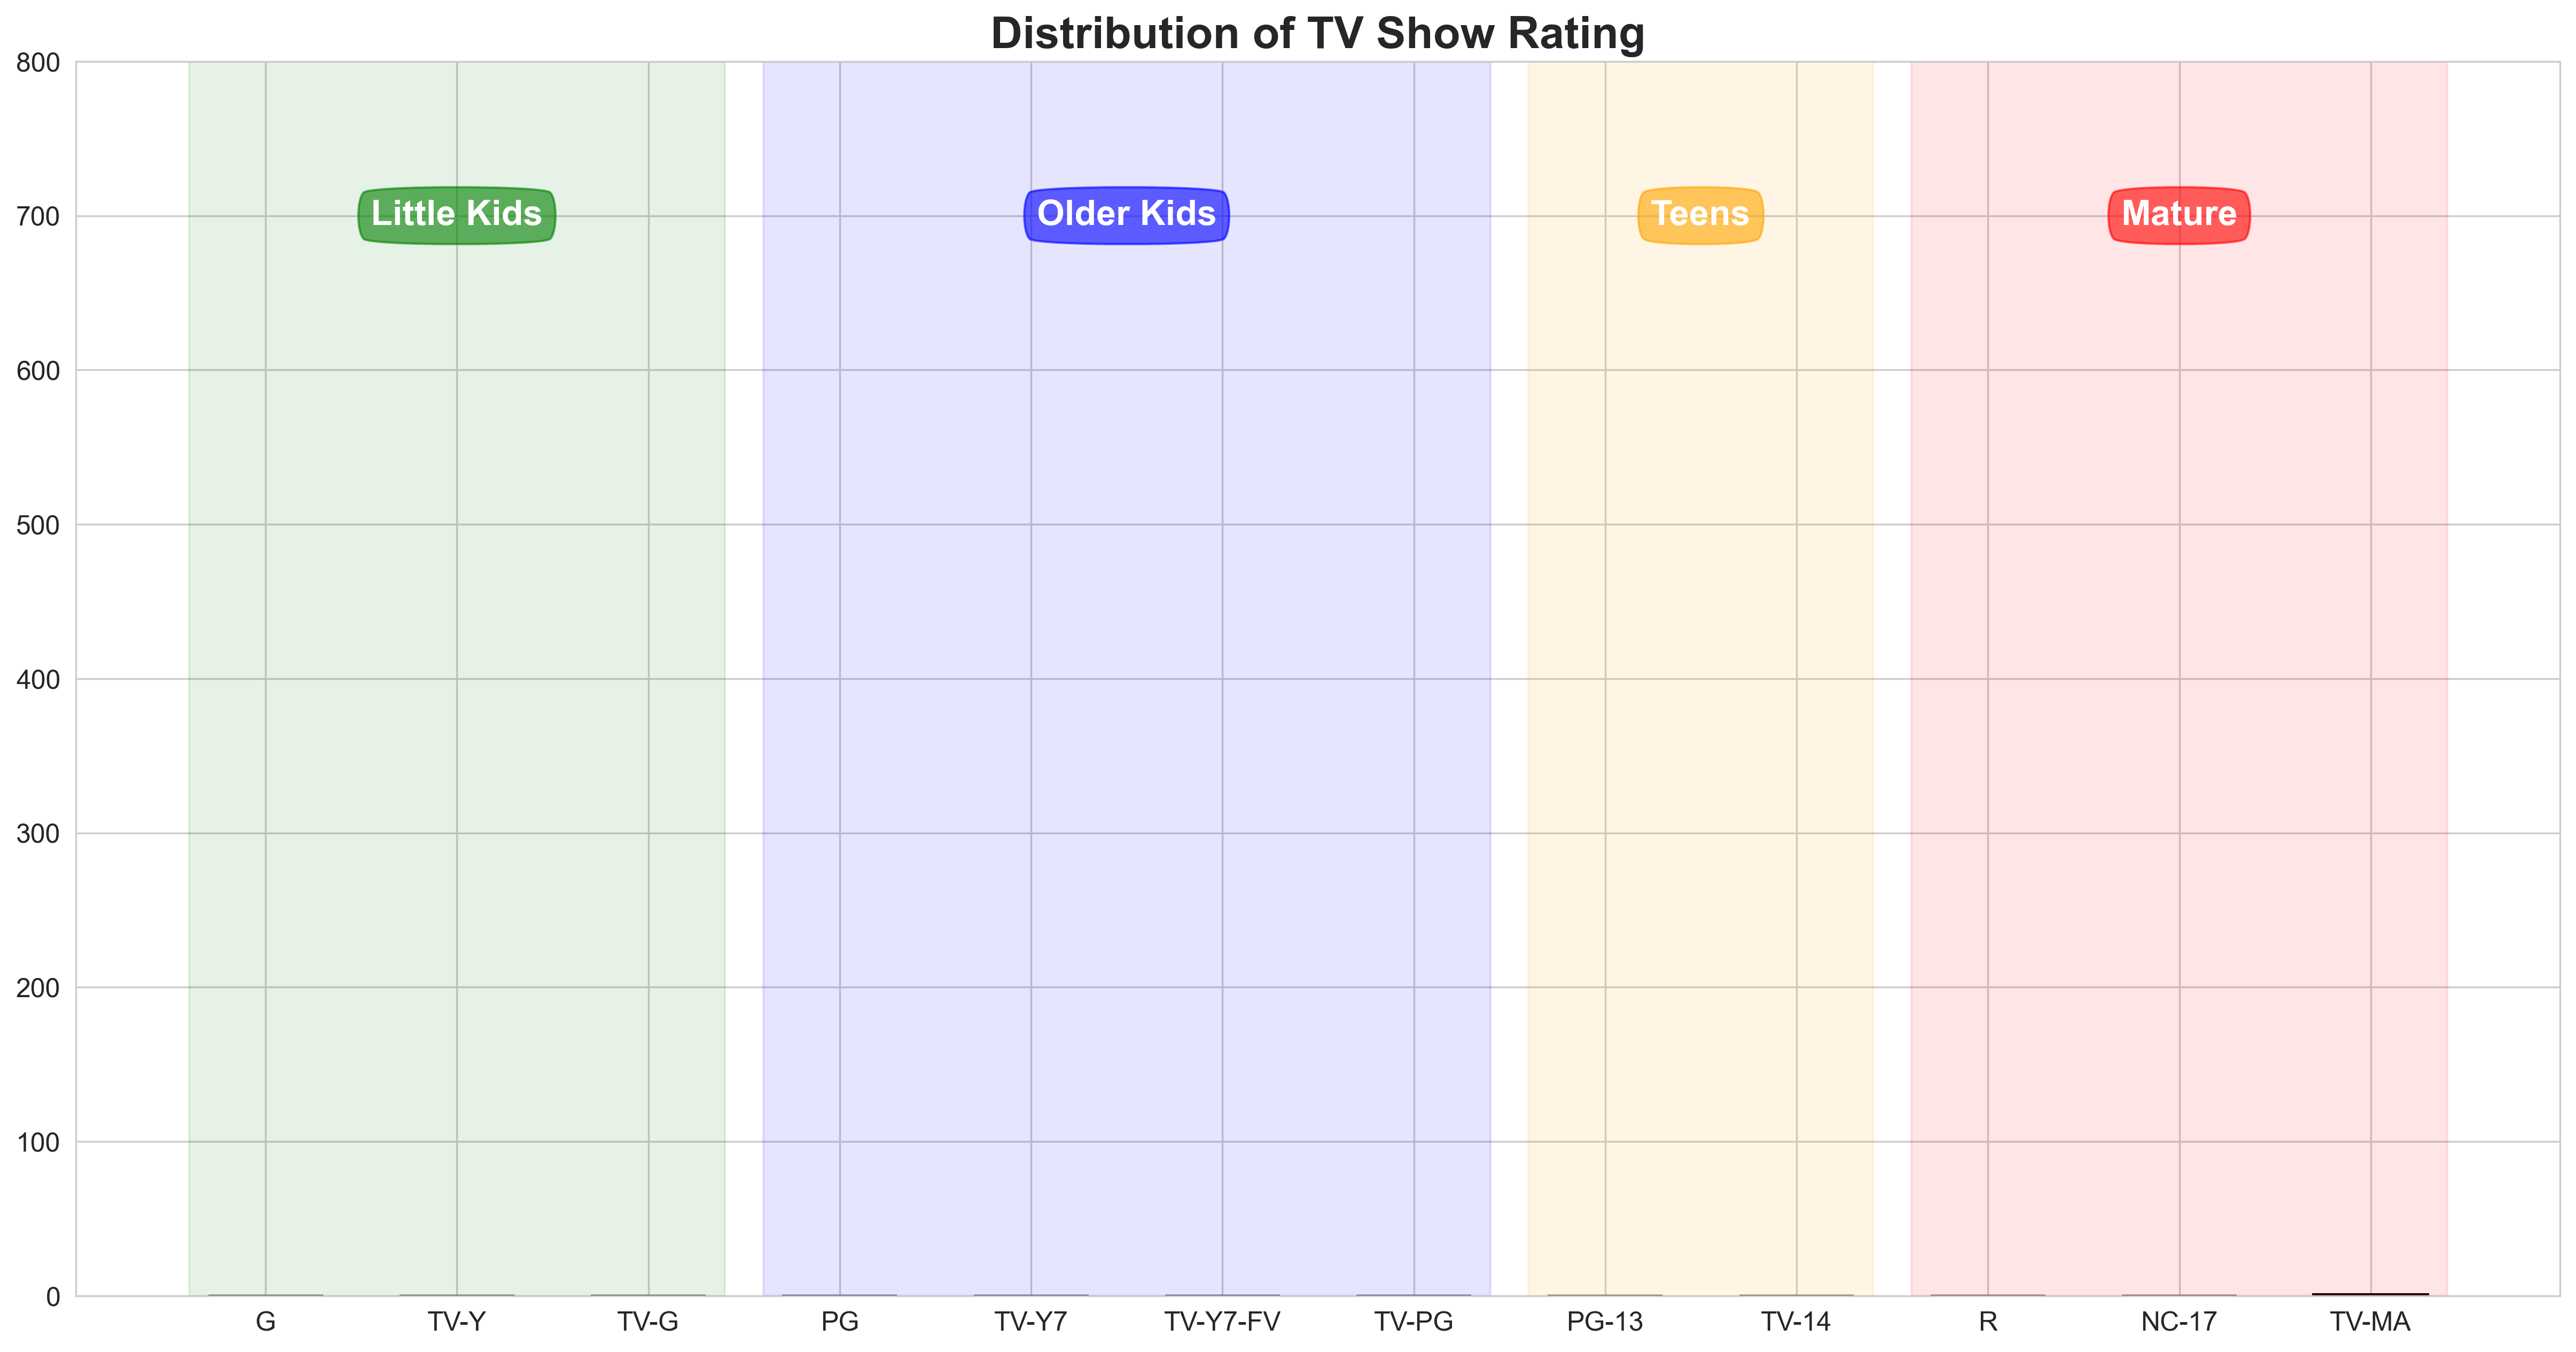

In [25]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

In [26]:
rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12

In [27]:
data['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)